In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dataset = pd.read_csv("Mall_Customers.csv")

In [19]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
X=dataset.iloc[:,3:4].values

In [21]:
X

array([[ 15],
       [ 15],
       [ 16],
       [ 16],
       [ 17],
       [ 17],
       [ 18],
       [ 18],
       [ 19],
       [ 19],
       [ 19],
       [ 19],
       [ 20],
       [ 20],
       [ 20],
       [ 20],
       [ 21],
       [ 21],
       [ 23],
       [ 23],
       [ 24],
       [ 24],
       [ 25],
       [ 25],
       [ 28],
       [ 28],
       [ 28],
       [ 28],
       [ 29],
       [ 29],
       [ 30],
       [ 30],
       [ 33],
       [ 33],
       [ 33],
       [ 33],
       [ 34],
       [ 34],
       [ 37],
       [ 37],
       [ 38],
       [ 38],
       [ 39],
       [ 39],
       [ 39],
       [ 39],
       [ 40],
       [ 40],
       [ 40],
       [ 40],
       [ 42],
       [ 42],
       [ 43],
       [ 43],
       [ 43],
       [ 43],
       [ 44],
       [ 44],
       [ 46],
       [ 46],
       [ 46],
       [ 46],
       [ 47],
       [ 47],
       [ 48],
       [ 48],
       [ 48],
       [ 48],
       [ 48],
       [ 48],
       [ 49],
      

In [24]:
from sklearn.cluster import SpectralClustering
clust = SpectralClustering (n_clusters=5)
mode_l = clust.fit_predict(X)

C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[5.80261684e-13 1.12739238e-06 3.23320849e-07 8.62371370e-07
 2.47904598e-06 1.03848174e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1483 instead with accuracy 
1.5212563451748101e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[1.01147619e-13 1.13075483e-06 3.37362790e-07 8.64323276e-07
 1.31748576e-06 5.47720788e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
supervised['Cluster_group'] = mode_l

C:\Anaconda\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


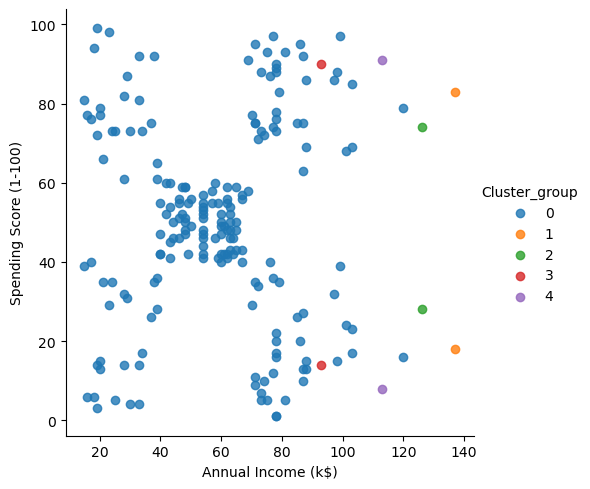

In [26]:
import seaborn as sb
facets= sb.lmplot(data = supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],fit_reg=False,legend_out=True)